In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [17]:
### Define the path to the file (a string in a variable 'db_file')
# if the data directory label is at the same level as the notebook,
# then the path is 'data/peace_import_auto.db'
db_file_address = '../data/peace_import_auto.db'

In [18]:
# Connexion à la base de données
try:
    cn = sql.connect(db_file_address)
    print("Connexion à la base de données réussie.")
except Exception as e:
    # En cas d'échec de la connexion
    print("Erreur lors de la connexion à la base de données :", e)
    raise


Connexion à la base de données réussie.


In [19]:
# Requête SQL pour extraire les 10 occurrences les plus fréquentes dans la colonne 'name'
query = """
SELECT name, COUNT(*) as occurrence
FROM dbp_occupation
GROUP BY name
ORDER BY occurrence DESC
LIMIT 10;
"""

In [20]:
# Exécuter la requête et charger les données dans un DataFrame
df = pd.read_sql_query(query, cn)
cn.close()

In [23]:
# Inspecter les premières lignes des données
print("Top 10 des noms les plus fréquents :")
print(df)

Top 10 des noms les plus fréquents :
             name  occurrence
0  Peace activist          15
1        Activist          11
2        Pacifist          10
3      Journalist           5
4          Author           4
5     Sociologist           3
6      Politician           3
7            Poet           3
8     Philosopher           2
9        Novelist           2


C:\Users\rroll\AppData\Local\Temp\ipykernel_13732\37341959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['occurrence'], y=df['name'], palette="Blues_r")


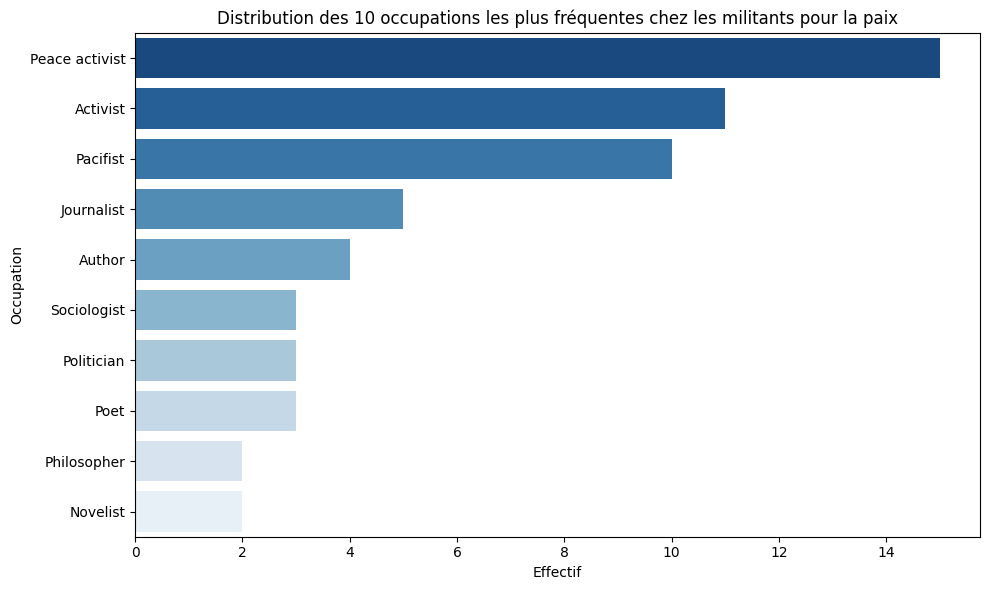

In [25]:
# Visualiser les 10 occurrences les plus fréquentes
plt.figure(figsize=(10, 6))
sns.barplot(x=df['occurrence'], y=df['name'], palette="Blues_r")
plt.title("Distribution des 10 occupations les plus fréquentes chez les militants pour la paix")
plt.xlabel("Effectif")
plt.ylabel("Occupation")
plt.tight_layout()